<a href="https://colab.research.google.com/github/boneeyah/QTW/blob/main/Case%20Study%204/Case_Study_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn-intelex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 26.3 MB/s eta 0:00:00


In [2]:
#Import the Libraries
from scipy.io import arff
import pandas as pd
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
import numpy as np
from numpy import random
from itertools import product
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')
from sklearn.utils import shuffle

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV

import xgboost as xgb
from xgboost import DMatrix
from sklearn.preprocessing import OneHotEncoder


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Mounted at /content/drive


In [3]:
df = pd.DataFrame()
i=1
x=str(i)
while i <6:
  data = arff.loadarff('/content/drive/MyDrive/Case_Study_4_Data/'+x+'year.arff')
  df_alt = pd.DataFrame(data[0])
  df = pd.concat([df,df_alt],ignore_index=True)
  i+=1
  x=str(i)

df


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
43401,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
43402,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
43403,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43397 non-null  float64
 1   Attr2   43397 non-null  float64
 2   Attr3   43397 non-null  float64
 3   Attr4   43271 non-null  float64
 4   Attr5   43316 non-null  float64
 5   Attr6   43397 non-null  float64
 6   Attr7   43397 non-null  float64
 7   Attr8   43311 non-null  float64
 8   Attr9   43396 non-null  float64
 9   Attr10  43397 non-null  float64
 10  Attr11  43361 non-null  float64
 11  Attr12  43271 non-null  float64
 12  Attr13  43278 non-null  float64
 13  Attr14  43397 non-null  float64
 14  Attr15  43369 non-null  float64
 15  Attr16  43310 non-null  float64
 16  Attr17  43311 non-null  float64
 17  Attr18  43397 non-null  float64
 18  Attr19  43277 non-null  float64
 19  Attr20  43278 non-null  float64
 20  Attr21  37551 non-null  float64
 21  Attr22  43397 non-null  float64
 22

In [5]:
for i in df.columns:
  if df[i].isnull().sum() > len(df)*.05:
    print('{} contains {} NAs'.format(i,df[i].isnull().sum()))

Attr21 contains 5854 NAs
Attr27 contains 2764 NAs
Attr37 contains 18984 NAs


In [6]:
df.drop(['Attr27','Attr37'],inplace=True,axis=1)
x = [n for n in list(range(1,65)) if n not in [27,37]]

for i in x:
  df['Attr'+str(i)] = df[['Attr'+str(i),'class']].groupby(by='class').transform(lambda grp: grp.fillna(pd.Series.mode(grp)[0]))
df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
43401,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
43402,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
43403,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43405 non-null  float64
 1   Attr2   43405 non-null  float64
 2   Attr3   43405 non-null  float64
 3   Attr4   43405 non-null  float64
 4   Attr5   43405 non-null  float64
 5   Attr6   43405 non-null  float64
 6   Attr7   43405 non-null  float64
 7   Attr8   43405 non-null  float64
 8   Attr9   43405 non-null  float64
 9   Attr10  43405 non-null  float64
 10  Attr11  43405 non-null  float64
 11  Attr12  43405 non-null  float64
 12  Attr13  43405 non-null  float64
 13  Attr14  43405 non-null  float64
 14  Attr15  43405 non-null  float64
 15  Attr16  43405 non-null  float64
 16  Attr17  43405 non-null  float64
 17  Attr18  43405 non-null  float64
 18  Attr19  43405 non-null  float64
 19  Attr20  43405 non-null  float64
 20  Attr21  43405 non-null  float64
 21  Attr22  43405 non-null  float64
 22

In [8]:
import re

#binary logistic
# roc AUC scores
#precision
#recall
#accuracy
#90s (AUC)
#XGBoost and Random forest

#change where you round at for increases in  precision

In [9]:
df['class'].value_counts()

b'0'    41314
b'1'     2091
Name: class, dtype: int64

In [10]:
df['class'] = df['class'].astype(str)
df['class'] = df['class'].str.replace(r'[b]*', '')
df['class'] = df['class'].str.replace(r'[\']*', '')
df['class'] = df['class'].astype('category')

<ipython-input-10-45738530801f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['class'] = df['class'].str.replace(r'[b]*', '')
<ipython-input-10-45738530801f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['class'] = df['class'].str.replace(r'[\']*', '')


In [11]:
df['class'].value_counts()

0    41314
1     2091
Name: class, dtype: int64

In [12]:
#scaling
cols = df.columns
num_cols = df._get_numeric_data().columns

#creating dataframe of numeric columns
scaler = StandardScaler()
num_df = scaler.fit_transform(df[num_cols])

#creating dataframe of categorical columns
cat_df = pd.DataFrame(df['class'])

df=cat_df.join(pd.DataFrame(num_df,columns=df[num_cols].columns, index=df[num_cols].index))
df

,class,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0,0.055246,-0.036047,0.051849,-0.014412,0.006814,0.061710,0.027362,-0.022332,-0.024040,...,4.868105,0.004936,0.029817,-0.005459,-0.010903,-0.013238,-0.021463,-0.010177,-0.039508,-0.027268
1,0,0.058109,-0.015443,0.065793,-0.014760,0.006527,0.007791,0.028864,-0.022994,-0.015129,...,-0.076621,0.004936,0.031488,-0.005463,-0.010918,-0.013374,-0.024837,-0.010000,-0.047701,-0.004448
2,0,0.071316,0.018113,0.028079,-0.016082,0.006267,0.007791,0.037743,-0.024100,-0.021337,...,-0.019119,0.004959,0.060576,-0.005480,-0.005227,-0.013347,-0.023610,-0.009806,-0.053198,-0.028214
3,0,0.015475,-0.048400,0.063318,-0.012902,0.007135,0.028606,-0.000131,-0.021272,-0.025340,...,0.183765,0.004924,0.011159,-0.005446,-0.010918,-0.013360,-0.024219,-0.010150,-0.041065,-0.028068
4,0,0.050827,0.003959,0.021179,-0.016585,0.006166,0.033805,0.016432,-0.023716,-0.023770,...,-0.064030,0.004939,0.036190,-0.005461,-0.009899,-0.013302,-0.022950,-0.009857,-0.051982,-0.027067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,1,-0.007434,0.019874,-0.013891,-0.017379,0.005977,0.007791,-0.013912,-0.024141,-0.015492,...,-0.058142,0.004917,0.003980,-0.005433,-0.000603,-0.013078,-0.008257,-0.010419,-0.015187,-0.029461
43401,1,-0.204824,0.064517,-0.168281,-0.020791,0.005185,-0.072488,-0.117550,-0.025763,-0.027204,...,-0.241453,0.004901,0.109159,-0.005424,-0.011067,-0.009994,0.050265,-0.010188,-0.038877,-0.028247
43402,1,-0.071549,0.113862,-0.071780,-0.018825,0.004317,-0.017075,-0.043481,-0.025479,-0.023468,...,-0.941094,0.004942,0.040866,-0.005464,-0.015197,-0.013193,-0.024446,-0.009277,-0.060962,-0.026192
43403,1,-0.048104,0.026332,-0.018195,-0.017665,0.006008,-0.007328,-0.035472,-0.024717,-0.028708,...,-0.093710,0.004879,-0.084634,-0.005401,0.038981,-0.013065,-0.019762,-0.010174,-0.039707,-0.030025


In [13]:
cat_df

,class
0,0
1,0
2,0
3,0
4,0
...,...
43400,1
43401,1
43402,1
43403,1


In [14]:
# Make target variable and data variable
y = df[['class']].astype(int).values.flatten()
X = df.loc[:, df.columns != 'class']

In [18]:
len(X)

43405

In [15]:
#takes about 30 mins on my pc
skf = StratifiedKFold(n_splits=5,random_state=624,shuffle=True)
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=624,n_jobs=-1,n_estimators=50,criterion='entropy', class_weight='balanced')

#log 2 is 6, sqrt is 8, will try a couple more values as well as none
params = {'min_samples_split':[2,4,8],'min_samples_leaf':[1,2,3],'max_features':['sqrt',7,10,'log2',None]}
grid = GridSearchCV(rf, param_grid=params,cv = skf, scoring = 'roc_auc')
results = grid.fit(X,y)

print(results.best_estimator_)
print(results.best_score_)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=None, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=50, n_jobs=-1,
                       random_state=624)
0.9126346032489561


random forest grid search returns the following:

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=None, min_samples_leaf=4,
                       min_samples_split=9, n_estimators=50, n_jobs=-1,
                       random_state=624)

0.9128255417337661

In [ ]:
## fit model with best params
rf = RandomForestClassifier(random_state = 624,n_jobs = -1, n_estimators= 500, criterion= 'entropy',max_features=results.best_params_.get('max_features'), min_samples_leaf=results.best_params_.get('min_samples_leaf'), min_samples_split=results.best_params_.get('min_samples_split'),class_weight='balanced')
#rf = RandomForestClassifier(random_state = 624,n_jobs = -1, n_estimators= 500, criterion= 'entropy',max_features=None, min_samples_leaf=3, min_samples_split=8)

cv_results = cross_validate(rf,X,y,scoring = ['roc_auc','accuracy','precision','recall'])

results from cross_val_score = {'fit_time': array([814.58124352, 800.96749759, 797.51462173, 820.0529983 ,
       806.91520572]), 'score_time': array([1.18171811, 0.70064592, 0.71089339, 0.70277381, 0.70549774]), 'test_roc_auc': array([0.91693544, 0.89812588, 0.9234541 , 0.93619189, 0.94596678]), 'test_accuracy': array([0.96025803, 0.95991245, 0.96152517, 0.9609492 , 0.96221633]), 'test_precision': array([0.91954023, 0.85714286, 0.875     , 0.88349515, 0.95959596]), 'test_recall': array([0.19138756, 0.20095694, 0.23444976, 0.21770335, 0.22673031])}


In [ ]:
print(cv_results)

{'fit_time': array([814.58124352, 800.96749759, 797.51462173, 820.0529983 ,
       806.91520572]), 'score_time': array([1.18171811, 0.70064592, 0.71089339, 0.70277381, 0.70549774]), 'test_roc_auc': array([0.91693544, 0.89812588, 0.9234541 , 0.93619189, 0.94596678]), 'test_accuracy': array([0.96025803, 0.95991245, 0.96152517, 0.9609492 , 0.96221633]), 'test_precision': array([0.91954023, 0.85714286, 0.875     , 0.88349515, 0.95959596]), 'test_recall': array([0.19138756, 0.20095694, 0.23444976, 0.21770335, 0.22673031])}


In [ ]:
cv_preds = cross_val_predict(rf,X,y,cv=5,method='predict_proba') # saved as a csv from previous run

In [ ]:
print(cv_preds)

In [ ]:
dtrain = xgb.DMatrix(X, label=y, enable_categorical=True)
#dtest = xgb.DMatrix(X_test, label=y_test) #will use all the data for cross validation

In [ ]:
## this is an exhaustive search like gridsearchCV (we could switch to picking a random set of 15 ish)
#xgb cv uses a seed of 0, so should be reproducible
def search(search_dict,X,y):
  ret = {} #results dictionary
  idx = 0 #results counter
  prods = list(product(*search_dict.values()))
  dtrain = xgb.DMatrix(X,label=y)
  for i in prods:
    a_dict = dict(zip(search_dict.keys(),i)) #this will be the hyperparams used in function call
    a_dict.update({'objective':'binary:logistic',
                   'eval_metric':'auc'})
    out = xgb.cv(params=a_dict, num_boost_round=500, dtrain=dtrain,nfold=5,stratified=True,early_stopping_rounds=5,verbose_eval=True)
    index=out.shape[0]-1
    loss_results=out.iloc[index,:]
    ret.update({idx:{'params':a_dict,'loss':loss_results.to_dict(),'length':out.shape[0]}})
    idx +=1
  return(ret)

In [ ]:
hyper_dict = {'eta':[0.01,0.1],
              'max_depth':[5,6,7],
              'gamma':[0,1,3],
              'lambda':[1,2,3],
              'alpha':[0,0.1,1]}
xgb_search = search(hyper_dict, X,y)

returns the following results, saved from previous run:

In [ ]:
xgb_search = {0: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 0, 'lambda': 1, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.944053157778313, 'train-auc-std': 0.0010118688970747899, 'test-auc-mean': 0.893711058827998, 'test-auc-std': 0.00973243618053967}, 'length': 500}, 1: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 0, 'lambda': 1, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9436987764797553, 'train-auc-std': 0.0007183863304577148, 'test-auc-mean': 0.8934238932170165, 'test-auc-std': 0.00962916829868623}, 'length': 500}, 2: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 0, 'lambda': 1, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9413316532379046, 'train-auc-std': 0.0013160675551447617, 'test-auc-mean': 0.8919198025966362, 'test-auc-std': 0.010138615047781761}, 'length': 500}, 3: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 0, 'lambda': 2, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9410421230692346, 'train-auc-std': 0.000981711847475234, 'test-auc-mean': 0.8918405486890719, 'test-auc-std': 0.009947756855856691}, 'length': 500}, 4: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 0, 'lambda': 2, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9409562154094395, 'train-auc-std': 0.0009642439801924658, 'test-auc-mean': 0.8918861848560573, 'test-auc-std': 0.009772543972686586}, 'length': 500}, 5: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 0, 'lambda': 2, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9380204930154805, 'train-auc-std': 0.0008941167531100302, 'test-auc-mean': 0.8898206669107186, 'test-auc-std': 0.010935119946569762}, 'length': 500}, 6: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 0, 'lambda': 3, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9387537319050914, 'train-auc-std': 0.0013453133419478094, 'test-auc-mean': 0.8901684062008647, 'test-auc-std': 0.010395215429620885}, 'length': 500}, 7: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 0, 'lambda': 3, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9382661100230637, 'train-auc-std': 0.0010390083615876998, 'test-auc-mean': 0.8895817752545817, 'test-auc-std': 0.010289306011072768}, 'length': 500}, 8: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 0, 'lambda': 3, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.935366403503115, 'train-auc-std': 0.001059874947353744, 'test-auc-mean': 0.8877595433982636, 'test-auc-std': 0.011219369479410194}, 'length': 500}, 9: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 1, 'lambda': 1, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9439130943528363, 'train-auc-std': 0.0008490592434571613, 'test-auc-mean': 0.8936268055439538, 'test-auc-std': 0.009380069581685847}, 'length': 500}, 10: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 1, 'lambda': 1, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9436703637517443, 'train-auc-std': 0.0009288360121516834, 'test-auc-mean': 0.8932472025002574, 'test-auc-std': 0.00942519470511131}, 'length': 500}, 11: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 1, 'lambda': 1, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9412978907826783, 'train-auc-std': 0.0009187276316760019, 'test-auc-mean': 0.8920503057369809, 'test-auc-std': 0.010658698849622212}, 'length': 500}, 12: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 1, 'lambda': 2, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.940911008341945, 'train-auc-std': 0.0009967849482904719, 'test-auc-mean': 0.8919166029059132, 'test-auc-std': 0.009846336775064173}, 'length': 500}, 13: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 1, 'lambda': 2, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9406188160427252, 'train-auc-std': 0.0010160835631137877, 'test-auc-mean': 0.8916446830606548, 'test-auc-std': 0.010190970085932201}, 'length': 500}, 14: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 1, 'lambda': 2, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9379606264404197, 'train-auc-std': 0.0011402918966840667, 'test-auc-mean': 0.8895508698700345, 'test-auc-std': 0.01080935092005108}, 'length': 500}, 15: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 1, 'lambda': 3, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9385029545450949, 'train-auc-std': 0.001235181056935839, 'test-auc-mean': 0.890169121926563, 'test-auc-std': 0.010427231797772824}, 'length': 500}, 16: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 1, 'lambda': 3, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9383344969988032, 'train-auc-std': 0.001056833824000666, 'test-auc-mean': 0.88986095284148, 'test-auc-std': 0.010365100404153655}, 'length': 500}, 17: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 1, 'lambda': 3, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9351487699707872, 'train-auc-std': 0.0012576549876517345, 'test-auc-mean': 0.8876802937774487, 'test-auc-std': 0.011487867278947243}, 'length': 500}, 18: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 3, 'lambda': 1, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9432274745102902, 'train-auc-std': 0.001154567801468573, 'test-auc-mean': 0.8932677436436306, 'test-auc-std': 0.009934901555533603}, 'length': 500}, 19: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 3, 'lambda': 1, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9431243813801397, 'train-auc-std': 0.001089961862704999, 'test-auc-mean': 0.8930565346320831, 'test-auc-std': 0.009763382444465996}, 'length': 500}, 20: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 3, 'lambda': 1, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9400529003069071, 'train-auc-std': 0.00117438482766924, 'test-auc-mean': 0.89120539992481, 'test-auc-std': 0.010019448886952704}, 'length': 500}, 21: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 3, 'lambda': 2, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9399769381703879, 'train-auc-std': 0.001011640340471006, 'test-auc-mean': 0.8911775088715281, 'test-auc-std': 0.01020693736327788}, 'length': 500}, 22: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 3, 'lambda': 2, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9398244516511639, 'train-auc-std': 0.000930824670905121, 'test-auc-mean': 0.891317109352582, 'test-auc-std': 0.010513152988036917}, 'length': 500}, 23: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 3, 'lambda': 2, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.936350262158486, 'train-auc-std': 0.001170414968925221, 'test-auc-mean': 0.8883060755014711, 'test-auc-std': 0.010644590099579323}, 'length': 500}, 24: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 3, 'lambda': 3, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9372037478705201, 'train-auc-std': 0.0012347313430877845, 'test-auc-mean': 0.8890552342865515, 'test-auc-std': 0.010311027343906815}, 'length': 500}, 25: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 3, 'lambda': 3, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9369046763263128, 'train-auc-std': 0.0015079807172757535, 'test-auc-mean': 0.8887441982025134, 'test-auc-std': 0.010637787464684356}, 'length': 500}, 26: {'params': {'eta': 0.01, 'max_depth': 5, 'gamma': 3, 'lambda': 3, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9338270936547064, 'train-auc-std': 0.0015356203093809058, 'test-auc-mean': 0.8870369523730466, 'test-auc-std': 0.011324899174478884}, 'length': 500}, 27: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 0, 'lambda': 1, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9677319651321744, 'train-auc-std': 0.0006957108593374171, 'test-auc-mean': 0.9070301517961973, 'test-auc-std': 0.009316828727486575}, 'length': 500}, 28: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 0, 'lambda': 1, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9676696918244563, 'train-auc-std': 0.0006999226317355523, 'test-auc-mean': 0.907332299045653, 'test-auc-std': 0.009211863759874936}, 'length': 500}, 29: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 0, 'lambda': 1, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9649501513095794, 'train-auc-std': 0.001279444080949459, 'test-auc-mean': 0.905250617918246, 'test-auc-std': 0.01001097034558623}, 'length': 500}, 30: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 0, 'lambda': 2, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9649870375314358, 'train-auc-std': 0.0010610102235327078, 'test-auc-mean': 0.905891892938777, 'test-auc-std': 0.009361796114582188}, 'length': 500}, 31: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 0, 'lambda': 2, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9646967205260074, 'train-auc-std': 0.001084689925729442, 'test-auc-mean': 0.9057897406249419, 'test-auc-std': 0.009412824513586215}, 'length': 500}, 32: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 0, 'lambda': 2, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9614166034199215, 'train-auc-std': 0.001726271536174625, 'test-auc-mean': 0.9035004566658389, 'test-auc-std': 0.010440492532368556}, 'length': 500}, 33: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 0, 'lambda': 3, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9621393949085801, 'train-auc-std': 0.0013504829793712988, 'test-auc-mean': 0.903906192683808, 'test-auc-std': 0.009682090236298553}, 'length': 500}, 34: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 0, 'lambda': 3, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9617174125719995, 'train-auc-std': 0.001217877732507236, 'test-auc-mean': 0.9033115875280459, 'test-auc-std': 0.01016144869409682}, 'length': 500}, 35: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 0, 'lambda': 3, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9590093581954904, 'train-auc-std': 0.0018555745909101164, 'test-auc-mean': 0.9014505993192896, 'test-auc-std': 0.009918244370506646}, 'length': 500}, 36: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 1, 'lambda': 1, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9674271990378138, 'train-auc-std': 0.0007905399892701659, 'test-auc-mean': 0.9069195551969076, 'test-auc-std': 0.009321780737068342}, 'length': 500}, 37: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 1, 'lambda': 1, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9676228257817912, 'train-auc-std': 0.0008807715516984775, 'test-auc-mean': 0.9071458119768909, 'test-auc-std': 0.009440455130684457}, 'length': 500}, 38: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 1, 'lambda': 1, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9646882701234618, 'train-auc-std': 0.00093764694478935, 'test-auc-mean': 0.905401189949863, 'test-auc-std': 0.010199573352441949}, 'length': 500}, 39: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 1, 'lambda': 2, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9647767045509423, 'train-auc-std': 0.0010717134819466653, 'test-auc-mean': 0.9058368638901548, 'test-auc-std': 0.009315853202914136}, 'length': 500}, 40: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 1, 'lambda': 2, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9644989890568094, 'train-auc-std': 0.001022153952932331, 'test-auc-mean': 0.9054092389131005, 'test-auc-std': 0.009551987301720967}, 'length': 500}, 41: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 1, 'lambda': 2, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9608435073606783, 'train-auc-std': 0.0012865425573098696, 'test-auc-mean': 0.9027670784583272, 'test-auc-std': 0.010103693795942557}, 'length': 500}, 42: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 1, 'lambda': 3, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9618022285032071, 'train-auc-std': 0.001293879341487257, 'test-auc-mean': 0.9037603898130213, 'test-auc-std': 0.00974544481329965}, 'length': 500}, 43: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 1, 'lambda': 3, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9614449708327518, 'train-auc-std': 0.001221866209352123, 'test-auc-mean': 0.9034441218305413, 'test-auc-std': 0.009814583347322348}, 'length': 500}, 44: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 1, 'lambda': 3, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.958394179782089, 'train-auc-std': 0.0016142403015772752, 'test-auc-mean': 0.9003834077196824, 'test-auc-std': 0.010908678796617933}, 'length': 500}, 45: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 3, 'lambda': 1, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9666962219757375, 'train-auc-std': 0.0011115850829862305, 'test-auc-mean': 0.9066041063275444, 'test-auc-std': 0.010068369213779162}, 'length': 500}, 46: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 3, 'lambda': 1, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9662703305187742, 'train-auc-std': 0.0009514353261381555, 'test-auc-mean': 0.9062683519201153, 'test-auc-std': 0.01011686091441944}, 'length': 500}, 47: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 3, 'lambda': 1, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9622185759769692, 'train-auc-std': 0.0013576299677380615, 'test-auc-mean': 0.9045638339464575, 'test-auc-std': 0.010535949412238529}, 'length': 500}, 48: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 3, 'lambda': 2, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9630660209143178, 'train-auc-std': 0.0008687521172818609, 'test-auc-mean': 0.9051319385814486, 'test-auc-std': 0.009489516154180103}, 'length': 500}, 49: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 3, 'lambda': 2, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9625970416699923, 'train-auc-std': 0.0010168759077634267, 'test-auc-mean': 0.9048120273564288, 'test-auc-std': 0.009380682178909285}, 'length': 500}, 50: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 3, 'lambda': 2, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9584832602238, 'train-auc-std': 0.0014031129674321613, 'test-auc-mean': 0.902040376075646, 'test-auc-std': 0.011132237308981711}, 'length': 500}, 51: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 3, 'lambda': 3, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9598048892660254, 'train-auc-std': 0.0014223530837645356, 'test-auc-mean': 0.9029883464311717, 'test-auc-std': 0.010100501800081832}, 'length': 500}, 52: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 3, 'lambda': 3, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9593831902299318, 'train-auc-std': 0.0016913527673780003, 'test-auc-mean': 0.9024264551221435, 'test-auc-std': 0.010280595713442708}, 'length': 500}, 53: {'params': {'eta': 0.01, 'max_depth': 6, 'gamma': 3, 'lambda': 3, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9553905350842676, 'train-auc-std': 0.0016359645968010816, 'test-auc-mean': 0.8991515400698387, 'test-auc-std': 0.011741787462426807}, 'length': 500}, 54: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 0, 'lambda': 1, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9837452817718061, 'train-auc-std': 0.00019914358314425835, 'test-auc-mean': 0.9178261591460604, 'test-auc-std': 0.007475315094083883}, 'length': 500}, 55: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 0, 'lambda': 1, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9833651276867874, 'train-auc-std': 0.0001757103560498428, 'test-auc-mean': 0.9181384084753939, 'test-auc-std': 0.007420724609430687}, 'length': 500}, 56: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 0, 'lambda': 1, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9807281648423561, 'train-auc-std': 0.0005220891118343251, 'test-auc-mean': 0.9149394303077221, 'test-auc-std': 0.008394453523503997}, 'length': 500}, 57: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 0, 'lambda': 2, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9808554233180388, 'train-auc-std': 0.0005123772993289834, 'test-auc-mean': 0.9154286856340322, 'test-auc-std': 0.00826133252691349}, 'length': 500}, 58: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 0, 'lambda': 2, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.980632201068549, 'train-auc-std': 0.0007652291665091619, 'test-auc-mean': 0.9149045994581562, 'test-auc-std': 0.008338169473388314}, 'length': 500}, 59: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 0, 'lambda': 2, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9776960995829835, 'train-auc-std': 0.0006780559313451396, 'test-auc-mean': 0.9127537870635608, 'test-auc-std': 0.008337120901522489}, 'length': 500}, 60: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 0, 'lambda': 3, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9783021373881852, 'train-auc-std': 0.0008221156116356303, 'test-auc-mean': 0.9131619173312092, 'test-auc-std': 0.009139277825524641}, 'length': 500}, 61: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 0, 'lambda': 3, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9780825785384332, 'train-auc-std': 0.0007195438177098575, 'test-auc-mean': 0.9128148278900291, 'test-auc-std': 0.008997115370313847}, 'length': 500}, 62: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 0, 'lambda': 3, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9747220305957212, 'train-auc-std': 0.0009364478255729281, 'test-auc-mean': 0.9101332856444259, 'test-auc-std': 0.009349383609934387}, 'length': 500}, 63: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 1, 'lambda': 1, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9835170002798078, 'train-auc-std': 0.00018695264458811693, 'test-auc-mean': 0.9176231967690628, 'test-auc-std': 0.00764475139047623}, 'length': 500}, 64: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 1, 'lambda': 1, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9833493854886918, 'train-auc-std': 0.00025368473189978563, 'test-auc-mean': 0.91773158566929, 'test-auc-std': 0.007850940860673266}, 'length': 500}, 65: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 1, 'lambda': 1, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9799241343181254, 'train-auc-std': 0.0008764165016920612, 'test-auc-mean': 0.9150793008531549, 'test-auc-std': 0.008919915379373816}, 'length': 500}, 66: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 1, 'lambda': 2, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9804652433599923, 'train-auc-std': 0.0007812433018779607, 'test-auc-mean': 0.9153231876031039, 'test-auc-std': 0.008655321130755947}, 'length': 500}, 67: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 1, 'lambda': 2, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9800659327946125, 'train-auc-std': 0.0006714461380433839, 'test-auc-mean': 0.9148862284037842, 'test-auc-std': 0.008367444254048673}, 'length': 500}, 68: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 1, 'lambda': 2, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.976633260735351, 'train-auc-std': 0.0004828475439013087, 'test-auc-mean': 0.912301384487607, 'test-auc-std': 0.008561204278937376}, 'length': 500}, 69: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 1, 'lambda': 3, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9779205547837219, 'train-auc-std': 0.0006446426289952961, 'test-auc-mean': 0.9129865842747076, 'test-auc-std': 0.00886973075725584}, 'length': 500}, 70: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 1, 'lambda': 3, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9774912992103619, 'train-auc-std': 0.0006834476029463438, 'test-auc-mean': 0.9127015797805088, 'test-auc-std': 0.008841504944064996}, 'length': 500}, 71: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 1, 'lambda': 3, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9739434150443763, 'train-auc-std': 0.0009278203395858334, 'test-auc-mean': 0.9103316444684173, 'test-auc-std': 0.009957901743498658}, 'length': 500}, 72: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 3, 'lambda': 1, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9817154579731306, 'train-auc-std': 0.0006309060505305569, 'test-auc-mean': 0.9174762593367021, 'test-auc-std': 0.008501900462354602}, 'length': 500}, 73: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 3, 'lambda': 1, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9813817219471386, 'train-auc-std': 0.00030558418950449854, 'test-auc-mean': 0.9174267897961398, 'test-auc-std': 0.008043912844937525}, 'length': 500}, 74: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 3, 'lambda': 1, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9767346232130825, 'train-auc-std': 0.0007908727611366813, 'test-auc-mean': 0.9139001293134994, 'test-auc-std': 0.009347291775715777}, 'length': 500}, 75: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 3, 'lambda': 2, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9778715855743416, 'train-auc-std': 0.0006370186431837384, 'test-auc-mean': 0.9142363523925088, 'test-auc-std': 0.00903170218047949}, 'length': 500}, 76: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 3, 'lambda': 2, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9772031696575729, 'train-auc-std': 0.0007613298922605459, 'test-auc-mean': 0.9138391481550375, 'test-auc-std': 0.00903830433407539}, 'length': 500}, 77: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 3, 'lambda': 2, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.972781707588186, 'train-auc-std': 0.0010043541027002824, 'test-auc-mean': 0.9118640663706866, 'test-auc-std': 0.010008187916587384}, 'length': 500}, 78: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 3, 'lambda': 3, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9741793255660227, 'train-auc-std': 0.001316145952198984, 'test-auc-mean': 0.9117041998507526, 'test-auc-std': 0.009776267280078296}, 'length': 500}, 79: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 3, 'lambda': 3, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9739449016462309, 'train-auc-std': 0.0011360825006442542, 'test-auc-mean': 0.9117344298421409, 'test-auc-std': 0.009521236267035436}, 'length': 500}, 80: {'params': {'eta': 0.01, 'max_depth': 7, 'gamma': 3, 'lambda': 3, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9691798981135197, 'train-auc-std': 0.0010155488963258408, 'test-auc-mean': 0.9085427894550477, 'test-auc-std': 0.010089548423163217}, 'length': 500}, 81: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 0, 'lambda': 1, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9978004479001304, 'train-auc-std': 0.000422486154909481, 'test-auc-mean': 0.9396370923327113, 'test-auc-std': 0.00669346663716043}, 'length': 299}, 82: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 0, 'lambda': 1, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9962775310164217, 'train-auc-std': 0.0002650754746673193, 'test-auc-mean': 0.9392512678221457, 'test-auc-std': 0.006125797455477196}, 'length': 260}, 83: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 0, 'lambda': 1, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.997982822111517, 'train-auc-std': 9.209946105818601e-05, 'test-auc-mean': 0.9423400871405019, 'test-auc-std': 0.00594247026419848}, 'length': 284}, 84: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 0, 'lambda': 2, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9971966677279468, 'train-auc-std': 0.0002800492543249537, 'test-auc-mean': 0.9410163243936376, 'test-auc-std': 0.0056213027693057995}, 'length': 295}, 85: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 0, 'lambda': 2, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.997776009362673, 'train-auc-std': 0.0002147462399522175, 'test-auc-mean': 0.9416709220978718, 'test-auc-std': 0.004978047394928261}, 'length': 308}, 86: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 0, 'lambda': 2, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9986329630019876, 'train-auc-std': 0.00019803830151168939, 'test-auc-mean': 0.9436961420579053, 'test-auc-std': 0.004211527355146213}, 'length': 333}, 87: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 0, 'lambda': 3, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9963243764683039, 'train-auc-std': 0.0004939142254673089, 'test-auc-mean': 0.9389826296919879, 'test-auc-std': 0.006376343625229315}, 'length': 289}, 88: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 0, 'lambda': 3, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9957968707354062, 'train-auc-std': 0.0005102447963643442, 'test-auc-mean': 0.9388036037847615, 'test-auc-std': 0.005995465927352494}, 'length': 273}, 89: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 0, 'lambda': 3, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9987953285369546, 'train-auc-std': 0.00022741321503421373, 'test-auc-mean': 0.9443227989641642, 'test-auc-std': 0.00540103893815445}, 'length': 360}, 90: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 1, 'lambda': 1, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9968810763395126, 'train-auc-std': 0.0005479849706381628, 'test-auc-mean': 0.938452518834963, 'test-auc-std': 0.007895847139323092}, 'length': 275}, 91: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 1, 'lambda': 1, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9989574336589391, 'train-auc-std': 0.0002247156178076158, 'test-auc-mean': 0.9420109982663799, 'test-auc-std': 0.0065627174934215085}, 'length': 344}, 92: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 1, 'lambda': 1, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9986985500896317, 'train-auc-std': 0.0002104617243383914, 'test-auc-mean': 0.9444711102648287, 'test-auc-std': 0.00550169430970492}, 'length': 321}, 93: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 1, 'lambda': 2, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9959796387336791, 'train-auc-std': 0.000399430905656091, 'test-auc-mean': 0.9373261245041871, 'test-auc-std': 0.006705109028922338}, 'length': 266}, 94: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 1, 'lambda': 2, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9922491225348123, 'train-auc-std': 0.0004977268249932425, 'test-auc-mean': 0.9355853893039953, 'test-auc-std': 0.00633873079072613}, 'length': 208}, 95: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 1, 'lambda': 2, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9976524037283493, 'train-auc-std': 0.00024638415530708045, 'test-auc-mean': 0.9425746053629682, 'test-auc-std': 0.005363805421219591}, 'length': 296}, 96: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 1, 'lambda': 3, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9941270064782766, 'train-auc-std': 0.00038605186951010004, 'test-auc-mean': 0.9376312915083375, 'test-auc-std': 0.0064644600595067875}, 'length': 244}, 97: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 1, 'lambda': 3, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.997963320339801, 'train-auc-std': 0.00028855186321387826, 'test-auc-mean': 0.9411191089646055, 'test-auc-std': 0.005838490718109163}, 'length': 336}, 98: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 1, 'lambda': 3, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9984897031318066, 'train-auc-std': 0.0002675417337470858, 'test-auc-mean': 0.9439610070554745, 'test-auc-std': 0.004692752952052922}, 'length': 365}, 99: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 3, 'lambda': 1, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9909390911047697, 'train-auc-std': 0.001756871582224152, 'test-auc-mean': 0.9357353586738395, 'test-auc-std': 0.006784238847325428}, 'length': 226}, 100: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 3, 'lambda': 1, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.991044522674876, 'train-auc-std': 0.0030413631583698273, 'test-auc-mean': 0.9335687206148018, 'test-auc-std': 0.0064593248592589156}, 'length': 229}, 101: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 3, 'lambda': 1, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9897989960963625, 'train-auc-std': 0.0018232453103654346, 'test-auc-mean': 0.933692000062534, 'test-auc-std': 0.008498236610301739}, 'length': 208}, 102: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 3, 'lambda': 2, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9885856894662164, 'train-auc-std': 0.003028126177198856, 'test-auc-mean': 0.9322958153795291, 'test-auc-std': 0.009269159390912295}, 'length': 218}, 103: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 3, 'lambda': 2, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9891750829411874, 'train-auc-std': 0.001028713125795829, 'test-auc-mean': 0.93357013321046, 'test-auc-std': 0.007416381706328198}, 'length': 216}, 104: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 3, 'lambda': 2, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9900467794601975, 'train-auc-std': 0.0019468455082226792, 'test-auc-mean': 0.9349183321822998, 'test-auc-std': 0.005837068026452072}, 'length': 233}, 105: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 3, 'lambda': 3, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9888914854565287, 'train-auc-std': 0.0021098162529858792, 'test-auc-mean': 0.9324015032217421, 'test-auc-std': 0.009465337861832825}, 'length': 234}, 106: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 3, 'lambda': 3, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9845083538336391, 'train-auc-std': 0.004100769030770317, 'test-auc-mean': 0.9304762600979057, 'test-auc-std': 0.0077545721942045695}, 'length': 194}, 107: {'params': {'eta': 0.1, 'max_depth': 5, 'gamma': 3, 'lambda': 3, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9859675620528566, 'train-auc-std': 0.0014352382058270923, 'test-auc-mean': 0.93097779300632, 'test-auc-std': 0.006337038920609562}, 'length': 194}, 108: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 0, 'lambda': 1, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9994355767879229, 'train-auc-std': 8.194463659662627e-05, 'test-auc-mean': 0.9427363758508529, 'test-auc-std': 0.005883180309442037}, 'length': 259}, 109: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 0, 'lambda': 1, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9999502698179867, 'train-auc-std': 1.99073082600224e-05, 'test-auc-mean': 0.9451904083649787, 'test-auc-std': 0.005817497088603088}, 'length': 332}, 110: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 0, 'lambda': 1, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9988516034163734, 'train-auc-std': 8.001274235063935e-05, 'test-auc-mean': 0.9431081575567098, 'test-auc-std': 0.005341868494177694}, 'length': 213}, 111: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 0, 'lambda': 2, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.996766832966521, 'train-auc-std': 0.00041567823584909384, 'test-auc-mean': 0.9391340769427744, 'test-auc-std': 0.005247501348022671}, 'length': 180}, 112: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 0, 'lambda': 2, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.998164709558474, 'train-auc-std': 0.00023758735113429242, 'test-auc-mean': 0.9407895228660503, 'test-auc-std': 0.005001391786659113}, 'length': 215}, 113: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 0, 'lambda': 2, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9999369395455091, 'train-auc-std': 1.7046194065916185e-05, 'test-auc-mean': 0.9471057863222253, 'test-auc-std': 0.004821945097695726}, 'length': 337}, 114: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 0, 'lambda': 3, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9984962815394607, 'train-auc-std': 0.00027009151534569654, 'test-auc-mean': 0.9411992669391551, 'test-auc-std': 0.00570091046574678}, 'length': 238}, 115: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 0, 'lambda': 3, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9989462657382131, 'train-auc-std': 0.0001581713298334058, 'test-auc-mean': 0.9429363985313813, 'test-auc-std': 0.004121694538493434}, 'length': 255}, 116: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 0, 'lambda': 3, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9995343303795743, 'train-auc-std': 8.176704798906879e-05, 'test-auc-mean': 0.9464803295108515, 'test-auc-std': 0.005028985199460874}, 'length': 280}, 117: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 1, 'lambda': 1, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9995735253279664, 'train-auc-std': 0.00012563343566141444, 'test-auc-mean': 0.9427595587275546, 'test-auc-std': 0.005956647687085706}, 'length': 272}, 118: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 1, 'lambda': 1, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9992645795442459, 'train-auc-std': 0.0001218013766838176, 'test-auc-mean': 0.9429423926651557, 'test-auc-std': 0.006043388445040031}, 'length': 242}, 119: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 1, 'lambda': 1, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9998661526661274, 'train-auc-std': 1.229080704422258e-05, 'test-auc-mean': 0.947859357555432, 'test-auc-std': 0.004885169632975724}, 'length': 315}, 120: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 1, 'lambda': 2, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9987873675844074, 'train-auc-std': 0.00013872734298453002, 'test-auc-mean': 0.940959773688341, 'test-auc-std': 0.005730922279668226}, 'length': 242}, 121: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 1, 'lambda': 2, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9975803023255704, 'train-auc-std': 0.00022503034189745683, 'test-auc-mean': 0.9408157740069051, 'test-auc-std': 0.005831654584212781}, 'length': 196}, 122: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 1, 'lambda': 2, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9990611571997947, 'train-auc-std': 0.00020699832036461094, 'test-auc-mean': 0.9442107255048111, 'test-auc-std': 0.005914141564210439}, 'length': 251}, 123: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 1, 'lambda': 3, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9977483604296978, 'train-auc-std': 0.00017173171932741694, 'test-auc-mean': 0.9412652332987264, 'test-auc-std': 0.004624941171890462}, 'length': 213}, 124: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 1, 'lambda': 3, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9970133092273568, 'train-auc-std': 0.0002241616666399052, 'test-auc-mean': 0.940992123678676, 'test-auc-std': 0.007654221626472076}, 'length': 197}, 125: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 1, 'lambda': 3, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.999417170867319, 'train-auc-std': 0.00014749222115064783, 'test-auc-mean': 0.9459760184309941, 'test-auc-std': 0.004950746848217961}, 'length': 292}, 126: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 3, 'lambda': 1, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9939634283255941, 'train-auc-std': 0.0012530139265590212, 'test-auc-mean': 0.9356933087555082, 'test-auc-std': 0.007558187897903656}, 'length': 177}, 127: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 3, 'lambda': 1, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9926197132063466, 'train-auc-std': 0.0031922412391391848, 'test-auc-mean': 0.9321665273162643, 'test-auc-std': 0.01053318727373549}, 'length': 157}, 128: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 3, 'lambda': 1, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9942031798692834, 'train-auc-std': 0.0011208211704625466, 'test-auc-mean': 0.9375104030732851, 'test-auc-std': 0.006729990244532702}, 'length': 186}, 129: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 3, 'lambda': 2, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9943421203214904, 'train-auc-std': 0.0008950923803883414, 'test-auc-mean': 0.9369391357968947, 'test-auc-std': 0.0068757574358476745}, 'length': 187}, 130: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 3, 'lambda': 2, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9937347709681532, 'train-auc-std': 0.0011075521470354317, 'test-auc-mean': 0.9356847964797375, 'test-auc-std': 0.0061499246314623635}, 'length': 185}, 131: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 3, 'lambda': 2, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.992907101462648, 'train-auc-std': 0.0009959669405975946, 'test-auc-mean': 0.9376381010475832, 'test-auc-std': 0.007173138588571204}, 'length': 190}, 132: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 3, 'lambda': 3, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9930124774076858, 'train-auc-std': 0.001643389894935891, 'test-auc-mean': 0.9365048052677242, 'test-auc-std': 0.007742742616567614}, 'length': 200}, 133: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 3, 'lambda': 3, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9916460124552622, 'train-auc-std': 0.002691351037897789, 'test-auc-mean': 0.9344635088303674, 'test-auc-std': 0.004491173540945545}, 'length': 192}, 134: {'params': {'eta': 0.1, 'max_depth': 6, 'gamma': 3, 'lambda': 3, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9908589354885464, 'train-auc-std': 0.002639589775136932, 'test-auc-mean': 0.9357844496096501, 'test-auc-std': 0.008055290227145217}, 'length': 174}, 135: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 0, 'lambda': 1, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9996384532783992, 'train-auc-std': 6.00732054612845e-05, 'test-auc-mean': 0.942173988045248, 'test-auc-std': 0.005672193822920018}, 'length': 192}, 136: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 0, 'lambda': 1, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9998506004640768, 'train-auc-std': 6.213055964284322e-05, 'test-auc-mean': 0.9433818265159012, 'test-auc-std': 0.006086258095387204}, 'length': 212}, 137: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 0, 'lambda': 1, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.999972639313752, 'train-auc-std': 1.0568738756632716e-05, 'test-auc-mean': 0.9469369854279364, 'test-auc-std': 0.004999272669595986}, 'length': 238}, 138: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 0, 'lambda': 2, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9999482566460811, 'train-auc-std': 1.4334236681311201e-05, 'test-auc-mean': 0.9449745155934475, 'test-auc-std': 0.004087843213121851}, 'length': 265}, 139: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 0, 'lambda': 2, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9999376341307171, 'train-auc-std': 4.3949911918165305e-05, 'test-auc-mean': 0.9463212010904328, 'test-auc-std': 0.005533727104132483}, 'length': 263}, 140: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 0, 'lambda': 2, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9999967843403696, 'train-auc-std': 1.8054417414945612e-06, 'test-auc-mean': 0.9497154895819213, 'test-auc-std': 0.004243132179513684}, 'length': 307}, 141: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 0, 'lambda': 3, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9999920782167852, 'train-auc-std': 4.850487457921707e-06, 'test-auc-mean': 0.9474572682169725, 'test-auc-std': 0.004422097313367321}, 'length': 339}, 142: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 0, 'lambda': 3, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9999910356908515, 'train-auc-std': 3.3991099105052424e-06, 'test-auc-mean': 0.9482344895930463, 'test-auc-std': 0.004079660912376151}, 'length': 325}, 143: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 0, 'lambda': 3, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9999928664595569, 'train-auc-std': 1.432234413109849e-06, 'test-auc-mean': 0.9493057497083349, 'test-auc-std': 0.0034479967743977786}, 'length': 315}, 144: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 1, 'lambda': 1, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9996965318017393, 'train-auc-std': 9.257954379403503e-05, 'test-auc-mean': 0.9439124468373882, 'test-auc-std': 0.005730932948753683}, 'length': 203}, 145: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 1, 'lambda': 1, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9998917860377784, 'train-auc-std': 1.299365599926092e-05, 'test-auc-mean': 0.9449437759961873, 'test-auc-std': 0.005048457730473185}, 'length': 230}, 146: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 1, 'lambda': 1, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9999151558197298, 'train-auc-std': 6.300424864277984e-05, 'test-auc-mean': 0.947333927236597, 'test-auc-std': 0.004651546366791486}, 'length': 249}, 147: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 1, 'lambda': 2, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9999393299297001, 'train-auc-std': 1.6135311207029555e-05, 'test-auc-mean': 0.9467853223624502, 'test-auc-std': 0.004059728090256012}, 'length': 294}, 148: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 1, 'lambda': 2, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9998944780331256, 'train-auc-std': 4.334986866789431e-05, 'test-auc-mean': 0.945292967067447, 'test-auc-std': 0.004948865708613285}, 'length': 270}, 149: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 1, 'lambda': 2, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9998888194229885, 'train-auc-std': 3.151644088839815e-05, 'test-auc-mean': 0.9467059715631942, 'test-auc-std': 0.004775129481794841}, 'length': 264}, 150: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 1, 'lambda': 3, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9996109581313226, 'train-auc-std': 0.00012527116899093733, 'test-auc-mean': 0.9434432232412069, 'test-auc-std': 0.00459369722962206}, 'length': 231}, 151: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 1, 'lambda': 3, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9998658460190862, 'train-auc-std': 5.755875677100325e-05, 'test-auc-mean': 0.9466322774701779, 'test-auc-std': 0.004733174979504683}, 'length': 272}, 152: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 1, 'lambda': 3, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9997710936029958, 'train-auc-std': 6.234792642919157e-05, 'test-auc-mean': 0.9461477759442902, 'test-auc-std': 0.005432575560574768}, 'length': 258}, 153: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 3, 'lambda': 1, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9971426211049564, 'train-auc-std': 0.00046713752119829834, 'test-auc-mean': 0.9385948692512986, 'test-auc-std': 0.008060956818218038}, 'length': 146}, 154: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 3, 'lambda': 1, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9974123200073356, 'train-auc-std': 0.00098208813140703, 'test-auc-mean': 0.9392040251777644, 'test-auc-std': 0.007018734090282375}, 'length': 169}, 155: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 3, 'lambda': 1, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9968560533823441, 'train-auc-std': 0.0009515089747033119, 'test-auc-mean': 0.9402461751096842, 'test-auc-std': 0.005681509924142827}, 'length': 177}, 156: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 3, 'lambda': 2, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.996646141210028, 'train-auc-std': 0.0006176058716508029, 'test-auc-mean': 0.9383612833207552, 'test-auc-std': 0.006497351342289687}, 'length': 171}, 157: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 3, 'lambda': 2, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9961428246063276, 'train-auc-std': 0.00045928078426412246, 'test-auc-mean': 0.9384526253015453, 'test-auc-std': 0.006381726777886415}, 'length': 148}, 158: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 3, 'lambda': 2, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9967227916365081, 'train-auc-std': 0.0001065911606943546, 'test-auc-mean': 0.9405050444727705, 'test-auc-std': 0.005777881807707647}, 'length': 173}, 159: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 3, 'lambda': 3, 'alpha': 0, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9960929152347502, 'train-auc-std': 0.000547302922486286, 'test-auc-mean': 0.9388986444079155, 'test-auc-std': 0.005895801886430929}, 'length': 178}, 160: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 3, 'lambda': 3, 'alpha': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9953246956803128, 'train-auc-std': 0.00043939952274026686, 'test-auc-mean': 0.9380989878561754, 'test-auc-std': 0.0056841863491888375}, 'length': 153}, 161: {'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 3, 'lambda': 3, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'loss': {'train-auc-mean': 0.9946105090760315, 'train-auc-std': 0.0013157622712346995, 'test-auc-mean': 0.9382658648195854, 'test-auc-std': 0.006597010899367785}, 'length': 176}}

In [ ]:
best_params = {}
best_score = 0
for i in xgb_search:
    if xgb_search.get(i).get('loss').get('test-auc-mean') > best_score:
        best_score = xgb_search.get(i).get('loss').get('test-auc-mean')
        best_params.update({'params':xgb_search.get(i).get('params'),'length':xgb_search.get(i).get('length')})
print(best_score)
print(best_params)

0.9497154895819213
{'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 0, 'lambda': 2, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'length': 307}


0.9497154895819213

{'params': {'eta': 0.1, 'max_depth': 7, 'gamma': 0, 'lambda': 2, 'alpha': 1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}, 'length': 307}

In [ ]:
skf = StratifiedKFold(n_splits=5,random_state=624,shuffle=True)

preds_xgb = dict()
for i, (train,test) in enumerate(skf.split(X,y)):
    dtrain = xgb.DMatrix(X.loc[train,:],y[train])
    dtest = xgb.DMatrix(X.loc[test,:],y[test])
    xgb_model = xgb.train(params={'objective':'binary:logistic','max_depth':7,'eta':0.1,'gamma':0,'lambda':2,'alpha':1},num_boost_round=500,dtrain=dtrain)
    pred = xgb_model.predict(dtest)
    binary_pred = []
    #skipping threshold, will do on saved results instead
    #for j in pred:
    #    if j > 0.5:
    #        binary_pred.append(1)
    #    else:
    #        binary_pred.append(0)
    #preds_xgb.update({i:{'y_test':y[test],'preds_proba':pred,'preds_binary':np.array(binary_pred)}})
    preds_xgb.update({i:{'y_test':y[test],'test_index':test,'preds_proba':pred}})

In [ ]:
preds_xgb

{0: {'y_test': array([0, 0, 0, ..., 1, 1, 1]),
  'preds_proba': array([3.4654190e-04, 1.5101054e-04, 1.9053230e-03, ..., 4.0283033e-01,
         1.6480599e-01, 1.6001383e-02], dtype=float32)},
 1: {'y_test': array([0, 0, 0, ..., 1, 1, 1]),
  'preds_proba': array([1.46926101e-03, 6.07819005e-04, 1.08092943e-04, ...,
         1.14342764e-01, 2.73801330e-02, 9.76455688e-01], dtype=float32)},
 2: {'y_test': array([0, 0, 0, ..., 1, 1, 1]),
  'preds_proba': array([5.2709039e-04, 9.2400117e-03, 4.5030209e-04, ..., 1.8228763e-01,
         9.9881327e-01, 3.2406408e-02], dtype=float32)},
 3: {'y_test': array([0, 0, 0, ..., 1, 1, 1]),
  'preds_proba': array([1.04907695e-02, 1.55379093e-05, 2.72947107e-03, ...,
         1.82689689e-02, 9.84880090e-01, 9.03637886e-01], dtype=float32)},
 4: {'y_test': array([0, 0, 0, ..., 1, 1, 1]),
  'preds_proba': array([4.1990387e-03, 1.7963372e-03, 2.9181846e-04, ..., 9.7752106e-01,
         1.1948755e-01, 2.8946400e-01], dtype=float32)}}

preds_xgb returns:
{0: {'y_test': array([0, 0, 0, ..., 1, 1, 1]),
  'preds_proba': array([3.4654190e-04, 1.5101054e-04, 1.9053230e-03, ..., 4.0283033e-01,
         1.6480596e-01, 1.6001383e-02], dtype=float32)},
 1: {'y_test': array([0, 0, 0, ..., 1, 1, 1]),
  'preds_proba': array([1.46926101e-03, 6.07819005e-04, 1.08092943e-04, ...,
         1.14342764e-01, 2.73801330e-02, 9.76455688e-01], dtype=float32)},
 2: {'y_test': array([0, 0, 0, ..., 1, 1, 1]),
  'preds_proba': array([5.2709068e-04, 9.2400163e-03, 4.5030183e-04, ..., 1.8228760e-01,
         9.9881327e-01, 3.2406408e-02], dtype=float32)},
 3: {'y_test': array([0, 0, 0, ..., 1, 1, 1]),
  'preds_proba': array([1.04907695e-02, 1.55379093e-05, 2.72947107e-03, ...,
         1.82689689e-02, 9.84880090e-01, 9.03637886e-01], dtype=float32)},
 4: {'y_test': array([0, 0, 0, ..., 1, 1, 1]),
  'preds_proba': array([4.1990387e-03, 1.7963382e-03, 2.9181846e-04, ..., 9.7752106e-01,
         1.1948755e-01, 2.8946394e-01], dtype=float32)}}

In [ ]:
#setting up a hyperparameter dataframe

learning_rates = [.08,.1,.15] #won't tune for learning rate, since it's not a hyperparameter, smaller with more rounds is generally better, so will start with .001
max_depths = [6,7,8]
gamma = [0,0.1]
lamb = [1,2]
alpha = [0.9,1,1.1]

param_df = pd.DataFrame(list(product(learning_rates, max_depths,gamma,lamb, alpha)), columns=['learning_rate', 'max_depth','gamma','lambda','alpha'])
param_df = shuffle(param_df,random_state=624)

#randomizing the dataframe order
param_df = param_df.reset_index()
param_df=param_df.drop(['index'], axis=1)
param_df.head(10)

,learning_rate,max_depth
0,0.30,20
1,0.30,10
2,0.60,10
3,0.40,10
4,0.60,3
5,0.10,5
6,0.40,5
7,0.60,20
8,0.50,3
9,0.30,3


In [ ]:
trials = 10
best_params = {}
i=0

best_result = []
best_params = {}
for i in range(trials):
  #random sampling from paramdf


  hyperparams = {'objective': 'binary:logistic', 'eta': param_df['learning_rate'][i], 'max_depth': param_df['max_depth'][i],'eval_metric':'auc','gamma':param_df['gamma'][i],'lambda':param_df['lambda'][i],'alpha':param_df['alpha'][i]}

  print(hyperparams)
  out=xgb.cv(params=hyperparams,  num_boost_round=500, dtrain=dtrain, nfold=5, stratified=True, early_stopping_rounds=5, verbose_eval=1)
  index=out.shape[0]-1
  result=out.iloc[index,2]
  if i< 1:
    best_result = result
    best_params = hyperparams

  if result > best_result:
      best_result = result
      best_params.update(hyperparams)
      print('result: ' ,result)
      #print('best result: ' ,best_result)
      #print('hyperparameters: ' ,hyperparams)
      #print('best hyperparameters: ' ,best_params)

      i+=1


{'objective': 'binary:logistic', 'eta': 0.3, 'max_depth': 20}
[0]	train-logloss:0.44790+0.00029	test-logloss:0.45192+0.00090
[1]	train-logloss:0.31107+0.00043	test-logloss:0.31810+0.00108
[2]	train-logloss:0.22357+0.00011	test-logloss:0.23388+0.00192
[3]	train-logloss:0.16392+0.00014	test-logloss:0.17698+0.00216
[4]	train-logloss:0.12232+0.00046	test-logloss:0.13808+0.00215
[5]	train-logloss:0.09242+0.00036	test-logloss:0.11093+0.00244
[6]	train-logloss:0.07064+0.00029	test-logloss:0.09172+0.00276
[7]	train-logloss:0.05447+0.00036	test-logloss:0.07736+0.00282
[8]	train-logloss:0.04248+0.00017	test-logloss:0.06734+0.00344
[9]	train-logloss:0.03347+0.00023	test-logloss:0.05989+0.00328
[10]	train-logloss:0.02682+0.00025	test-logloss:0.05498+0.00342
[11]	train-logloss:0.02161+0.00029	test-logloss:0.05102+0.00350
[12]	train-logloss:0.01777+0.00025	test-logloss:0.04844+0.00387
[13]	train-logloss:0.01475+0.00025	test-logloss:0.04666+0.00411
[14]	train-logloss:0.01243+0.00020	test-logloss:0.04

In [ ]:
best_params

{'objective': 'binary:logistic', 'eta': 0.5, 'max_depth': 5}

In [ ]:
hyperparams = { 'eta':0.5,
                'max_depth': 5,
                'objective': 'binary:logistic'}

XGBModel = xgb.XGBClassifier(params=hyperparams, num_boost_round=50, dtrain=dtrain, nfold=5, stratified=True, early_stopping_rounds=5, verbose_eval=1)

In [ ]:
# will have to be refit with tuned parameters, but this works
# returns results in dictionary with test set, predicted probabilities, and binary class
# binary class could be removed to be used outside the function with the probabilities
skf = StratifiedKFold(n_splits=5,random_state=624,shuffle=True)

preds_xgb = dict()
for i, (train,test) in enumerate(skf.split(X,y)):
    dtrain = xgb.DMatrix(X.loc[train,:],y[train])
    dtest = xgb.DMatrix(X.loc[test,:],y[test])
    xgb_model = xgb.train(params={'objective':'binary:logistic','max_depth':10,'eta':0.1},num_boost_round=3,dtrain=dtrain)
    pred = xgb_model.predict(dtest)
    binary_pred = []
    for j in pred:
        if j > 0.5:
            binary_pred.append(1)
        else:
            binary_pred.append(0)
    preds_xgb.update({i:{'y_test':y[test],'preds_proba':pred,'preds_binary':np.array(binary_pred)}})

NameError: ignored

In [ ]:
out

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.450124,0.000357,0.452195,0.000630
1,0.314638,0.000541,0.318561,0.001051
2,0.229106,0.000762,0.234403,0.001444
3,0.171727,0.001076,0.178485,0.001965
4,0.131634,0.000962,0.140218,0.002320
5,0.103055,0.001328,0.113195,0.002348
6,0.082302,0.001140,0.093999,0.002971
7,0.066170,0.000694,0.079625,0.003395
8,0.054074,0.000984,0.069482,0.003335
9,0.044830,0.000920,0.062058,0.003344


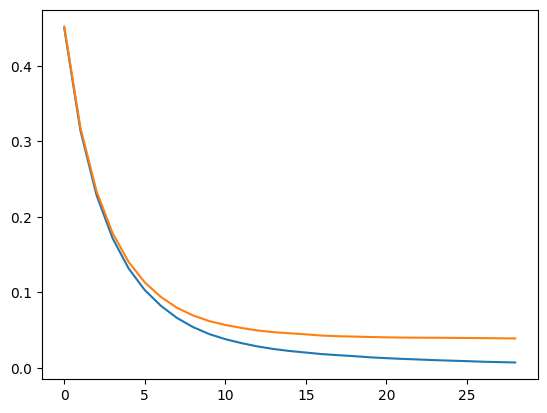

In [ ]:
import matplotlib.pyplot as plt

#needs to run longer to see differences in the lines?
plt.plot(out['train-logloss-mean'])
plt.plot(out['test-logloss-mean'])
plt.show()